## Análisis Método Jacobi


### Descripción del Método Jacobi

El método Jacobi es un método iterativo que sirve para solucionar sistemas lineales de la forma $Ax = b$, dado un vector inicial $v_0$, este método realiza una transformación de la fila $E_i$ a un despeje de la variable $x_{i}$, es decir, 

$$x_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x_j) + b_i$$

Así para cada $k \geq 1$, se genera los componentes $x^{(k)}_i$, de $X^{(k)}$ a partir de los componentes $X^{k-1}$ por medio de

$$x^{(k)}_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x^{(k-1)}_j) + b_i$$

para $i=1,2,3,4\dots ,n$.

### Construcción del Método Jacobi

El código realizan el Método Jacobi, donde:

- La primera función realiza la transformación del sistema lineal $Ax = b$ a un sistema donde las filas corresponden al despeje de la variable $x_i$ que lo denotamos $x = Ty + c$.
- La segunda función toma la transformación del sistema lineal a solucionar, un vector inicial, la tolerancia de error, el número de iteraciones y la norma con la cual queremos calcular el error; Para calcular las iteraciones en el método Jacobi y al final retorna una tabla con las aproximaciones y una tabla de errores de cada iteración. 

In [51]:
# Librerias a usar
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def gen_Ax_b(m, n, low, high):
    Ax_b = np.array([[np.random.uniform(low, high) for j in range(n)] for i in range(m)])
    return Ax_b

In [53]:
# Transforma el sistema Ax = b al sistema Tx = c
def transformar_sistema(A, b):
    if A[0, 0] == 0:
        return print("No es posible realizar la transformación")

    # Inicializar la matriz de transformación T
    T = np.zeros_like(A, dtype=float)

    # Iterar sobre las filas de la matriz A
    for i in range(len(A)):
        # Seleccionar la fila actual y los elementos de la diagonal
        fila_actual = A[i]
        diag_element = fila_actual[i]

        # Despejar xi de la ecuación correspondiente
        for j in range(len(fila_actual)):
            if j != i:
                T[i][j] = -fila_actual[j] / diag_element

        T[i][i] = 0

    c = b / np.diag(A)
    return T, c

In [54]:
# Definición de la función para el método Jacobi

def met_jacobi(T, c, v_0, tol, n_iteration, norm):
    norm_vk = 0
    norm_v0_vk = 0
    error = []
    table_vk = np.array([v_0])
    for i in range(0, n_iteration):
        # Matriz por vector para hallar el vector k-ésimo

        v_k = np.round(np.dot(T, v_0) + c, 4)

        # Calculo de la norma
        if norm == 1:
            norm_v0_vk = np.linalg.norm(v_k - v_0, np.inf)
            norm_vk = np.linalg.norm(v_k, np.inf)
        elif norm == 2:
            norm_v0_vk = np.linalg.norm(v_k - v_0)
            norm_vk = np.linalg.norm(v_k)

        # Calculo del error relativo
        error.append(norm_v0_vk / norm_vk)
        v_0 = v_k
        table_vk = np.append(table_vk, [v_k])
        if error[i] <= tol:
            return table_vk.reshape(i + 2, len(T)).transpose(), error

    return table_vk.reshape(n_iteration + 1, len(T)).transpose(), error

In [9]:
# Definición del sistema lineal a resolver y el vector inicial v_0

Ax_b = np.array([[10, -1, 2, 0, 6],
                 [-1, 11, -1, 3, 25],
                 [2, -1, 10, -1, -11],
                 [0, 3, -1, 8, 15]])
v_0 = np.array([0, 0, 0, 0])

print(f'El sistema Ax = b esta representado por A:\n{Ax_b[:, :-1]}\nb: {Ax_b[:, -1]}\nEl vector inicial es v_0:{v_0}')

El sistema Ax = b esta representado por A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b: [  6  25 -11  15]
El vector inicial es v_0:[0 0 0 0]


In [11]:
# Sacamos su transformación x = Ty + c
T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'El sistema x = Ty + c esta representado por T:\n{T}\nc: {c}')

El sistema x = Ty + c esta representado por T:
[[ 0.          0.1        -0.2         0.        ]
 [ 0.09090909  0.          0.09090909 -0.27272727]
 [-0.2         0.1         0.          0.1       ]
 [ 0.         -0.375       0.125       0.        ]]
c: [ 0.6         2.27272727 -1.1         1.875     ]


In [14]:
# Ejecutamos el método Jacobi usando la norma uniforme obteniendo
table_vk, error1 = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=1)
table_vk

array([[ 0.    ,  0.6   ,  1.0473,  0.9326,  1.0152,  0.989 ,  1.0032,
         0.9981,  1.0006,  0.9997],
       [ 0.    ,  2.2727,  1.7159,  2.0533,  1.9537,  2.0114,  1.9922,
         2.0023,  1.9987,  2.0004],
       [ 0.    , -1.1   , -0.8052, -1.0494, -0.9681, -1.0103, -0.9945,
        -1.002 , -0.999 , -1.0004],
       [ 0.    ,  1.875 ,  0.8852,  1.1309,  0.9738,  1.0214,  0.9944,
         1.0036,  0.9989,  1.0006]])

In [15]:
error1

[1.0,
 0.5768401421994289,
 0.1643208493644378,
 0.0804115268464964,
 0.02868648702396345,
 0.013552856138941942,
 0.0050441991709534026,
 0.0023515284935208074,
 0.0008498300339932188]

In [16]:
# Si realizamos el mismo ejemplo usando la norma euclidiana obtenemos:
table_vk, error2 = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=2)
table_vk

array([[ 0.    ,  0.6   ,  1.0473,  0.9326,  1.0152,  0.989 ,  1.0032,
         0.9981,  1.0006,  0.9997,  1.0001],
       [ 0.    ,  2.2727,  1.7159,  2.0533,  1.9537,  2.0114,  1.9922,
         2.0023,  1.9987,  2.0004,  1.9998],
       [ 0.    , -1.1   , -0.8052, -1.0494, -0.9681, -1.0103, -0.9945,
        -1.002 , -0.999 , -1.0004, -0.9998],
       [ 0.    ,  1.875 ,  0.8852,  1.1309,  0.9738,  1.0214,  0.9944,
         1.0036,  0.9989,  1.0006,  0.9998]])

In [17]:
error2

[1.0,
 0.5367360915247712,
 0.18188757237630526,
 0.08446233792590757,
 0.0337267193021878,
 0.014925340066409524,
 0.006190693696364133,
 0.002682188905647378,
 0.0011049457869265044,
 0.0004660324992609669]

Si gráficamos los errores podemos ver, que los valores son casi semejantes y que si tomamos la norma euclidiana en este ejemplo se demora una iteración más para llegar a una aproximación debajo de la tolerancia.

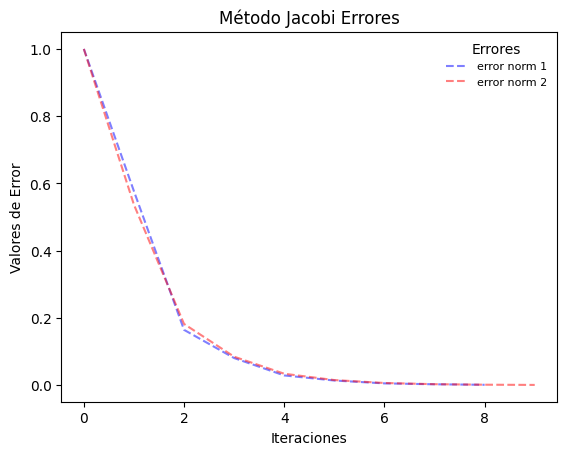

In [27]:

plt.plot(error1, '--', label='error norm 1', alpha=0.5, color='blue')
plt.plot(error2, '--', label='error norm 2', alpha=0.5, color='red')

plt.title('Método Jacobi Errores')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8)

In [79]:
mean_errors_1 = []
mean_errors_2 = []
for i in range(20):
    # Generación del sistema Ax = b
    Ax_b = gen_Ax_b(4, 5, 0, 1)
    # Transformación del sistema
    T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])

    table_vk1, error1 = met_jacobi(T, c, v_0, tol=10 ** (-i), n_iteration=50, norm=1)
    table_vk2, error2 = met_jacobi(T, c, v_0, tol=10 ** (-i), n_iteration=50, norm=2)

    mean_errors_1.append(np.mean(error1))
    mean_errors_2.append(np.mean(error2))

print(np.array(mean_errors_1))
print(np.array(mean_errors_2))

[1.         1.40694483 1.20501739 1.23056322 1.1080977  1.16289341
 1.15467707 1.10337159 1.03829155 1.1710545  1.15547334 1.19630364
 1.19600265 1.1961175  1.05822497 1.31535925 1.21413235 1.12272443
 1.4300425  1.13936912]
[1.         1.39335393 1.20756128 1.22422429 1.09749635 1.16687307
 1.15536342 1.10184498 1.03761427 1.17444265 1.15522882 1.19628386
 1.19585306 1.1968711  1.05954612 1.31642744 1.20209729 1.124394
 1.42584441 1.13822876]


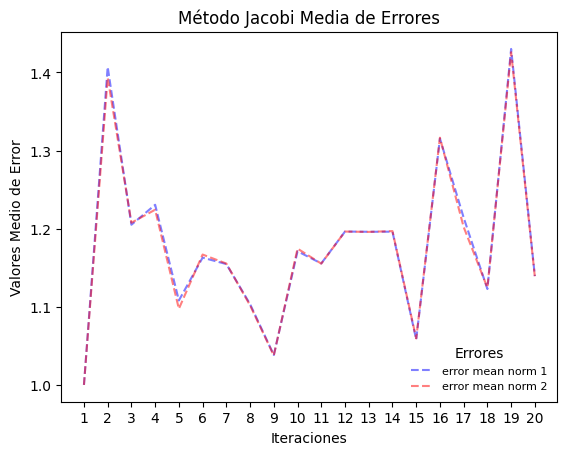

In [80]:
plt.plot(np.array(mean_errors_1), '--', label='error mean norm 1', alpha=0.5, color='blue')
plt.plot(np.array(mean_errors_2), '--', label='error mean norm 2', alpha=0.5, color='red')

plt.xticks(range(len(mean_errors_2)), range(1, len(mean_errors_2) + 1))

plt.title('Método Jacobi Media de Errores')
plt.xlabel('Iteraciones')
plt.ylabel('Valores Medio de Error')
plt.legend(frameon=False, title='Errores', fontsize=8)

In [82]:
np.linalg.norm(np.array(mean_errors_2) - np.array(mean_errors_1), np.inf)

0.013590897502681054